In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.DataFrame({'x1': [3.0, 1.2, 2.8, 2.5, 3.3, 2.7, 2.3, 1.5, 1.8, 1.4], 
                   'x2': [2.5, 1.0, 2.3, 2.1, 2.8, 2.2, 1.9, 1.3, 1.5, 1.2], 
                   'x3': [1.5, 0.6, 1.4, 1.2, 1.7, 1.3, 1.1, 0.7, 0.9, 0.8]})

In [5]:
# Vector de medias
x1_mean = df['x1'].mean()
x2_mean = df['x2'].mean()
x3_mean = df['x3'].mean()
mean_vector = np.array([x1_mean, x2_mean, x3_mean])
print("Vector de medias:")
print(mean_vector)

Vector de medias:
[2.25 1.88 1.12]


In [6]:
# Tabla con datos centrados
centered_df = df - mean_vector
print("\nTabla con datos centrados:")
print(centered_df)


Tabla con datos centrados:
     x1    x2    x3
0  0.75  0.62  0.38
1 -1.05 -0.88 -0.52
2  0.55  0.42  0.28
3  0.25  0.22  0.08
4  1.05  0.92  0.58
5  0.45  0.32  0.18
6  0.05  0.02 -0.02
7 -0.75 -0.58 -0.42
8 -0.45 -0.38 -0.22
9 -0.85 -0.68 -0.32


In [32]:
# Matrz de covarianza
cov_matrix = np.cov(centered_df.T, bias = True) # vamos a usar la matriz de covarianza poblacional, por eso bias = True
print("\nMatriz de covarianza:")
print(cov_matrix)


Matriz de covarianza:
[[0.4825 0.397  0.238 ]
 [0.397  0.3276 0.1964]
 [0.238  0.1964 0.1196]]


In [24]:
# Eigenvectores
lambda_1, lambda_2, lambda_3 = np.linalg.eig(cov_matrix)[0]
eigenvector_1, eigenvector_2, eigenvector_3 = np.linalg.eig(cov_matrix)[1].T
print("\nEigenvalores:")
print(f"Eigenvalor 1: {lambda_1}, {lambda_1/sum([lambda_1, lambda_2, lambda_3])*100:.2f}% varianza explicada")
print(f"Eigenvalor 2: {lambda_2}, {lambda_2/sum([lambda_1, lambda_2, lambda_3])*100:.2f}% varianza explicada")
print(f"Eigenvalor 3: {lambda_3}, {lambda_3/sum([lambda_1, lambda_2, lambda_3])*100:.2f}% varianza explicada")
print("\nEigenvectores:")
print("Eigenvector 1:", eigenvector_1)
print("Eigenvector 2:", eigenvector_2)
print("Eigenvector 3:", eigenvector_3)


Eigenvalores:
Eigenvalor 1: 0.9274053361875679, 99.75% varianza explicada
Eigenvalor 2: 0.0005150069029491138, 0.06% varianza explicada
Eigenvalor 3: 0.0017796569094837551, 0.19% varianza explicada

Eigenvectores:
Eigenvector 1: [-0.72096249 -0.59403535 -0.35684044]
Eigenvector 2: [-0.56783245  0.80158562 -0.1871545 ]
Eigenvector 3: [-0.39721456 -0.0676942   0.9152257 ]


In [25]:
# Tabla de proyecciones a la primera componente principal
projection_1 = centered_df.dot(eigenvector_1)
print("\nTabla de proyecciones a la primera componente principal:")
print(projection_1)


Tabla de proyecciones a la primera componente principal:
0   -1.044623
1    1.465319
2   -0.745940
3   -0.339476
4   -1.510491
5   -0.578756
6   -0.040792
7    1.035135
8    0.628671
9    1.130951
dtype: float64


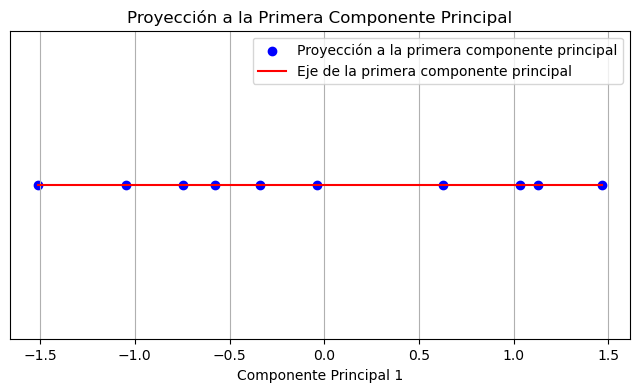

In [30]:
# Graficar proyección a la primera componente principal
plt.figure(figsize=(8, 4))
plt.scatter(projection_1, np.zeros_like(projection_1), color='blue', label='Proyección a la primera componente principal')
plt.plot([min(projection_1), max(projection_1)], [0, 0], color='red', label='Eje de la primera componente principal')
plt.title('Proyección a la Primera Componente Principal')
plt.xlabel('Componente Principal 1')
plt.yticks([])
plt.legend()
plt.grid()
plt.show()